### Cat Or not Cat; ( Image Recognition problem)
Here’s how we can approach the problem using a **Decision Tree** in Python, with the dataset provided.

### **Step 1: Dataset Preparation**

First, we convert the categorical features into numerical values (using **one-hot encoding**) and create `X_train` and `y_train` arrays.

|   Ear Shape   | Face Shape  | Whiskers |   Cat  |
|:-------------:|:-----------:|:--------:|:------:|
| Pointy (1)    | Round (1)   | Present (1) |    1   |
| Floppy (0)    | Not Round (0) | Present (1) |    1   |
| Floppy (0)    | Round (1)   | Absent (0)  |    0   |
| Pointy (1)    | Not Round (0) | Present (1) |    0   |
| Pointy (1)    | Round (1)   | Present (1) |    1   |
| Pointy (1)    | Round (1)   | Absent (0)  |    1   |
| Floppy (0)    | Not Round (0) | Absent (0)  |    0   |
| Pointy (1)    | Round (1)   | Absent (0)  |    1   |
| Floppy (0)    | Round (1)   | Absent (0)  |    0   |
| Floppy (0)    | Round (1)   | Absent (0)  |    0   |

Notice:

- Ear Shape: Pointy = 1, Floppy = 0
- Face Shape: Round = 1, Not Round = 0
- Whiskers: Present = 1, Absent = 0

Therefore, we have two sets:

- `X_train`: for each example, contains 3 features:
            - Ear Shape (1 if pointy, 0 otherwise)
            - Face Shape (1 if round, 0 otherwise)
            - Whiskers (1 if present, 0 otherwise)
            
- `y_train`: whether the animal is a cat
            - 1 if the animal is a cat
            - 0 otherwise

### **Step 2: Code for Decision Tree Model**


Predictions: [1 1 0 0 1 1 0 1 0 0]


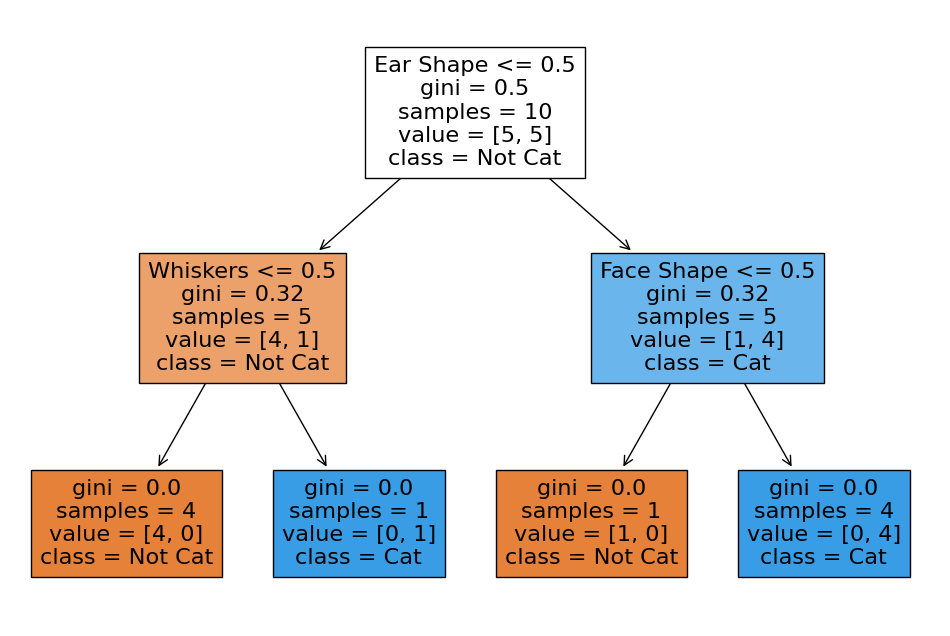

In [4]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier

# Define the dataset (X_train) with one-hot encoded features and labels (y_train)
X_train = [
    [1, 1, 1],  # Pointy ears, Round face, Whiskers present
    [0, 0, 1],  # Floppy ears, Not round face, Whiskers present
    [0, 1, 0],  # Floppy ears, Round face, No whiskers
    [1, 0, 1],  # Pointy ears, Not round face, Whiskers present
    [1, 1, 1],  # Pointy ears, Round face, Whiskers present
    [1, 1, 0],  # Pointy ears, Round face, No whiskers
    [0, 0, 0],  # Floppy ears, Not round face, No whiskers
    [1, 1, 0],  # Pointy ears, Round face, No whiskers
    [0, 1, 0],  # Floppy ears, Round face, No whiskers
    [0, 1, 0],  # Floppy ears, Round face, No whiskers
]
# I added this different example to predict another y list
# X_train_2 = [
#     [1, 0, 1],  
#     [1, 0, 1],  
#     [0, 1, 0],  
#     [1, 0, 1],  
#     [1, 0, 1],  
#     [1, 1, 0],  
#     [0, 0, 1],  
#     [1, 1, 0],  
#     [1, 0, 0],  
#     [0, 0, 0], 
# ]

y_train = [1, 1, 0, 0, 1, 1, 0, 1, 0, 0]  # Cat or not (1 = cat, 0 = not cat)

# Create the Decision Tree Classifier
model = DecisionTreeClassifier()
# you can add depth:
# model = DecisionTreeClassifier(max_depth = 2)

# Train the model
model.fit(X_train, y_train)

# Predict using the model
predictions = model.predict(X_train)
#predictions = model.predict(X_train_2)

# Output the predictions
print(f"Predictions: {predictions}")

# To see how the tree is structured, you can visualize it
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(model, filled=True, feature_names=["Ear Shape", "Face Shape", "Whiskers"], class_names=["Not Cat", "Cat"])
plt.show()



### **Step 3: Explanation of the Code**

1. **Data Preparation:**
   - We convert the features to a one-hot encoded format: 
     - Ear Shape: Pointy = 1, Floppy = 0
     - Face Shape: Round = 1, Not Round = 0
     - Whiskers: Present = 1, Absent = 0
   - `X_train` represents the features, and `y_train` represents whether the animal is a cat (1) or not (0).

2. **Training the Model:**
   - We use `DecisionTreeClassifier()` from `scikit-learn` to create and train the model.

3. **Making Predictions:**
   - The model is then used to make predictions on the training data, and the results are printed.

4. **Tree Visualization:**
   - The decision tree can be visualized using `plot_tree()` to understand how the model is making decisions.

### **Expected Output**

The `DecisionTreeClassifier` will predict based on the input features, and you'll see the tree structure that represents how the model splits based on the `Ear Shape`, `Face Shape`, and `Whiskers` features.

In the visualization:
- Each node shows how the decision is made based on one of the features.
- The leaves (end nodes) represent the final classification (Cat or Not Cat).

This simple decision tree model should be able to classify whether an image represents a cat or not based on the features provided.

## gini, what is it?

In scikit-learn's decision tree implementation, "gini" refers to the Gini impurity, which is used as a criterion for splitting nodes in the decision tree. Let's dive into how it's used and what it means:

1. Gini Impurity in scikit-learn:
   The Gini impurity is a measure of the probability of incorrectly classifying a randomly chosen element in the dataset if it were randomly labeled according to the distribution of labels in the subset.

2. Formula:
   For a set of items with J classes, and p_i being the fraction of items labeled with class i in the set, the Gini impurity is:

   ```
   Gini = 1 - Σ(p_i)^2  (for i from 1 to J)
   ```

3. Usage in scikit-learn:
   In scikit-learn's DecisionTreeClassifier, you can specify "gini" as the criterion parameter:

   ```python
   from sklearn.tree import DecisionTreeClassifier

   clf = DecisionTreeClassifier(criterion='gini')
   ```

4. How it works:
   - At each node, the algorithm calculates the Gini impurity for the current set of samples.
   - It then considers all possible features and split points.
   - For each potential split, it calculates the weighted sum of the Gini impurities of the resulting subsets.
   - The split that results in the lowest Gini impurity (i.e., the highest information gain) is chosen.

5. Interpretation:
   - A Gini impurity of 0 means all samples at the node belong to the same class (pure node).
   - The maximum Gini impurity depends on the number of classes. For binary classification, the maximum is 0.5.

6. Example:
   For a binary classification problem:
   ```python
   # Node with 3 samples of class A and 7 of class B
   p_A = 3/10
   p_B = 7/10
   gini = 1 - (p_A**2 + p_B**2)
   # gini ≈ 0.42
   ```

7. Comparison with Entropy:
   - Gini is an alternative to entropy for measuring the quality of a split.
   - Generally, Gini and entropy produce similar results.
   - Gini is slightly faster to compute and is the default criterion in scikit-learn's DecisionTreeClassifier.

8. Advantages:
   - Computationally efficient
   - Works well with noisy data
   - Tends to isolate the most frequent class in its own branch of the tree

Remember, while Gini impurity is a powerful tool for building decision trees, the choice between Gini and other criteria (like entropy) often doesn't significantly impact the performance of the resulting model. The tree's depth, minimum samples per leaf, and other hyperparameters usually have a more substantial effect on the model's performance.